In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [6]:
"""
Q- how to read csv file as data science in general?
A- first you need to get the path of the file, then you need to use the read_csv function from pandas
"""
path="Iris Species/data/Iris.csv"
df=pd.read_csv(path)

In [8]:
"""
Q- how to show the first 5 rows of the dataset?
A- df.head()
"""
df.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [11]:
"""
Q- how to get any number of rows from a dataframe?
A- df.head(x)
"""
df.head(7)

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa
5,6,5.4,3.9,1.7,0.4,Iris-setosa
6,7,4.6,3.4,1.4,0.3,Iris-setosa


In [13]:
"""
Q- how to get some information about the data? for exmples dtypes , numbers of null values , numbers of unique values , numbers of rows and columns
A- df.info()
"""
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


In [14]:
"""
Q- how to drop a column in pandas?
A- df.drop(columns=['column_name'])
"""
df.drop("Id",axis=1,inplace=True)

### EDA


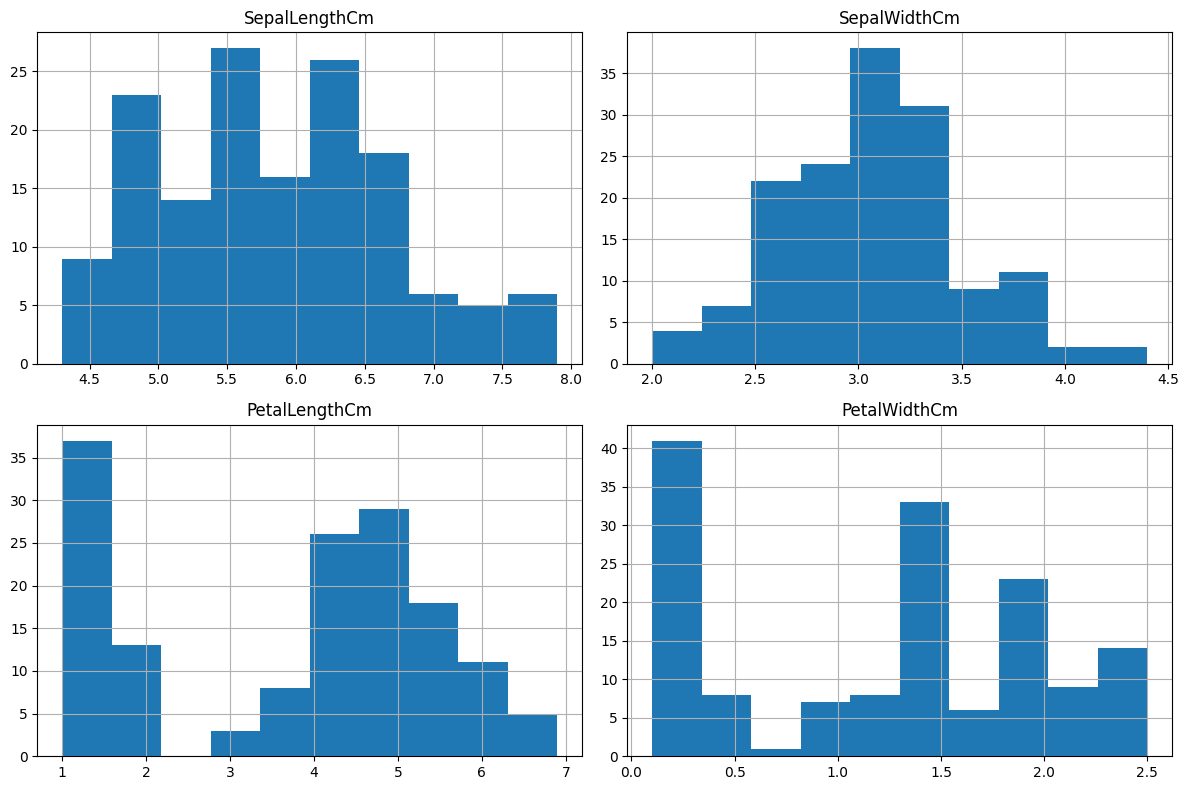

In [15]:
"""
Q- How to plot the distribution of each feature in the dataset?
A- Using histograms with matplotlib to visualize the distribution
"""
"""
Q- Can you detail the steps?
A- Step by step process:
1. Import required libraries (matplotlib.pyplot and pandas)
2. Select numerical features from the dataframe
3. Create a figure object with appropriate size using plt.figure()
4. Use df.hist() to plot histograms for all numerical features
5. Adjust layout to prevent overlap using plt.tight_layout()
6. Customize plot appearance (labels, titles) if needed
7. Display the plots using plt.show()
"""
df.hist(figsize=(12,8))
plt.tight_layout()
plt.show()

<Axes: xlabel='Species', ylabel='SepalWidthCm'>

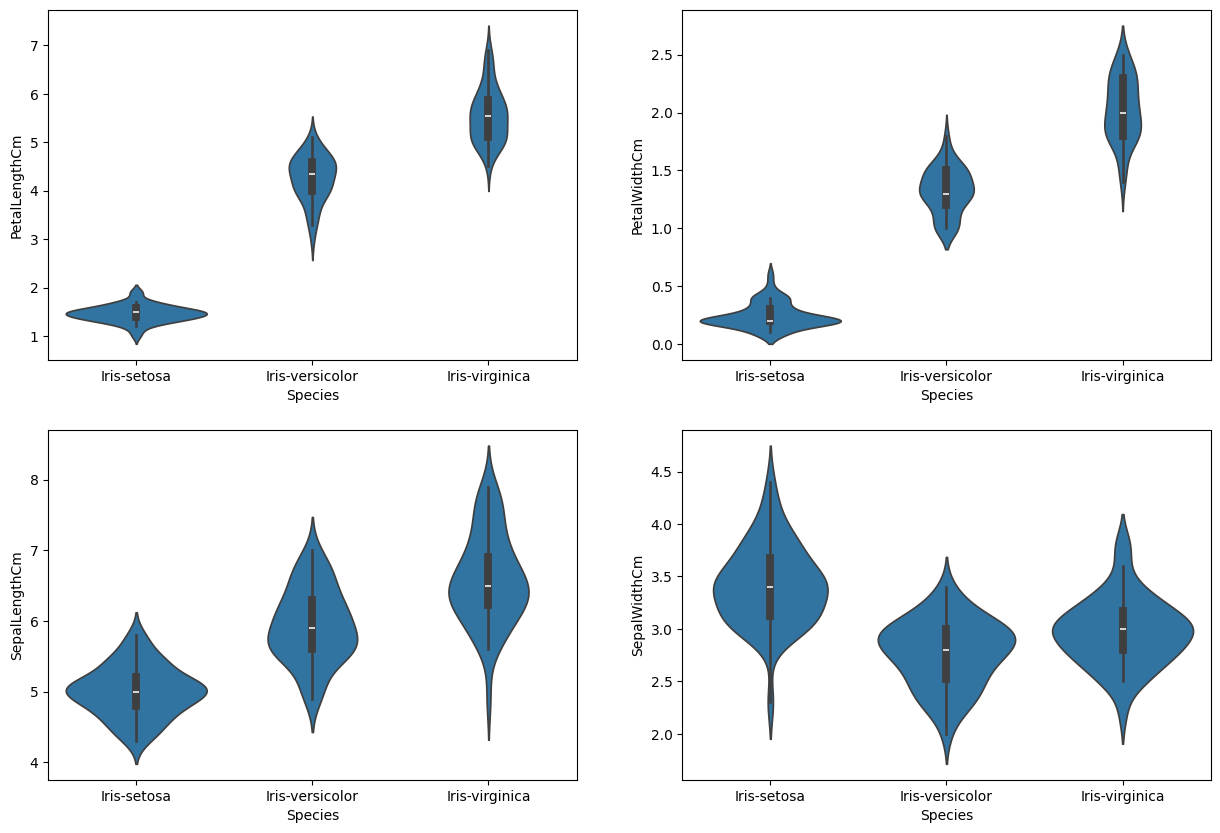

In [17]:
"""
Q- how to show how the length and width vary according to the species 
A- use the violin plot 
"""
plt.figure(figsize=(15,10))
plt.subplot(2,2,1)
sns.violinplot(x='Species',y='PetalLengthCm',data=df)
plt.subplot(2,2,2)
sns.violinplot(x='Species',y='PetalWidthCm',data=df)
plt.subplot(2,2,3)
sns.violinplot(x='Species',y='SepalLengthCm',data=df)
plt.subplot(2,2,4)
sns.violinplot(x='Species',y='SepalWidthCm',data=df)

# Problem Classification

## What type of machine learning problem is this?

This is a **supervised learning** problem because:
- We have a labeled dataset with input features and target variable (Species)
- The goal is to learn a mapping function from input features to target variable

## Types of Supervised Learning Problems

There are two main types:
1. Classification
2. Regression 

## Our Problem Type

This is a **classification** problem because:
- We need to predict a categorical variable (Species)
- There are 3 distinct classes of Iris flowers
- The model will learn to classify new flowers based on their features (sepal/petal measurements)

In [19]:
from sklearn.model_selection import train_test_split
X=df.drop('Species', axis=1)
y=df['Species']
# Assuming you have your features (X) and target variable (y)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
# Now you have your train and test sets
print("Train set shape:", X_train.shape, y_train.shape)


Train set shape: (120, 4) (120,)


In [20]:
# Import logistic regression from sklearn
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix

# Create the logistic regression model
lr_model = LogisticRegression(random_state=42)

# Fit the model on training data
lr_model.fit(X_train, y_train)

# Make predictions on test data
y_pred = lr_model.predict(X_test)

# Evaluate the model
print("Classification Report:")
print(classification_report(y_test, y_pred))
print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred))

Classification Report:
                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        10
Iris-versicolor       1.00      1.00      1.00         9
 Iris-virginica       1.00      1.00      1.00        11

       accuracy                           1.00        30
      macro avg       1.00      1.00      1.00        30
   weighted avg       1.00      1.00      1.00        30


Confusion Matrix:
[[10  0  0]
 [ 0  9  0]
 [ 0  0 11]]
